In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

trig1_verts = np.array([[0, 0], [2, 0], [0.7, 1.2], [0, 0]])
trig2_verts = np.array([[0, 0], [2, 0], [1.1, -1.8], [0, 0]])

uvs = np.array([[0, 0],[1, 0],[0.5, math.sqrt(3)/2]])
# uvs = np.array([[1, 0],[0.5, math.sqrt(3)/2], [0, 0]])
# uvs = np.array([[0.5, math.sqrt(3)/2], [0, 0],[1, 0]])


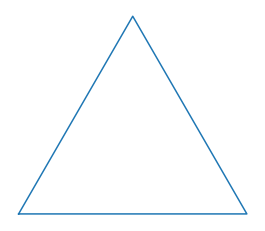

In [19]:
uvs_trngl = np.array([[0, 0],[1, 0],[0.5, math.sqrt(3)/2], [0, 0]])
plt.plot(uvs_trngl[:, 0], uvs_trngl[:, 1])
plt.axis('scaled')
plt.axis('off')
plt.savefig('../res/trngl_equilateral.png')

In [5]:
class Elem:
    def __init__(self, vs, fgs):
        self.vs = vs
        self.bs = np.zeros(3)
        self.cs = np.zeros(3)
        
        self.center = (vs[0] + vs[1] + vs[2]) / 3
        print("self.center: ", self.center)
        
        self.bs[0] = vs[1][1] - vs[2][1]
        self.bs[1] = vs[2][1] - vs[0][1]
        self.bs[2] = vs[0][1] - vs[1][1]
        
        self.cs[0] = vs[2][0] - vs[1][0]
        self.cs[1] = vs[0][0] - vs[2][0]
        self.cs[2] = vs[1][0] - vs[0][0]
        
        self.twoA = np.dot(vs[:,0], self.bs)
        
        fs = fgs[:,0]
        gs = fgs[:,1]
        
        self.fx = np.dot(fs, self.bs) / self.twoA
        self.fy = np.dot(fs, self.cs) / self.twoA
        self.gx = np.dot(gs, self.bs) / self.twoA
        self.gy = np.dot(gs, self.cs) / self.twoA

self.center:  [0.9 0.4]
self.center:  [ 1.03333333 -0.6       ]


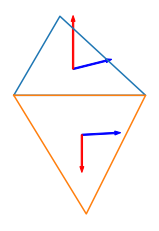

In [15]:

elem1 = Elem(trig1_verts[:3], uvs)
elem2 = Elem(trig2_verts[:3], uvs)

plt.plot(trig1_verts[:, 0], trig1_verts[:, 1])
plt.plot(trig2_verts[:, 0], trig2_verts[:, 1])
plt.arrow(elem1.center[0], elem1.center[1], elem1.fx, elem1.fy, color='b', width=0.02)
plt.arrow(elem1.center[0], elem1.center[1], elem1.gx, elem1.gy, color='r', width=0.02)
plt.arrow(elem2.center[0], elem2.center[1], elem2.fx, elem2.fy, color='b', width=0.02)
plt.arrow(elem2.center[0], elem2.center[1], elem2.gx, elem2.gy, color='r', width=0.02)
plt.axis('scaled')
plt.axis('off')
plt.savefig('../res/trngl_gradients.png')

In [8]:
def writeTriangleObj(name, big_triangle_verts, big_triangle_uvs):
    f = open("objs/"+name+".obj", "w")
    for vid in range(len(big_triangle_verts)):
        f.write("v " + str(big_triangle_verts[vid][0]) + " " + str(big_triangle_verts[vid][1]) + " 0\n")
    for vid in range(len(big_triangle_uvs)):
        f.write("vt " + str(big_triangle_uvs[vid][0]) + " " + str(big_triangle_uvs[vid][1]) + "\n")
    f.write("vn 0.0000 0.0000 1.0000\n")
    f.write("f 1/1/1 2/2/1 3/3/1\n")
    f.close()

In [11]:
writeTriangleObj("trngle_gradient_1", elem1.vs, np.array([[0.5, 0], [1, 1], [0, 1]]))
writeTriangleObj("trngle_gradient_2", elem2.vs, np.array([[0.5, 0], [1, 1], [0, 1]]))